最小二乘法
===

# 1.问题的引入
设函数y=f(x)在m个互异点的观测数据为$\{(x_1,y_1),(x_2,y_2),...,(x_m,y_m)\}$，求一个简单的近似函数$\varphi{(x)}$,使之"最好"的逼近
f(x)，而不必满足插值原则。一般我们是无法也没必要找到完全符合$\varphi{(x_i)}=y_i$的曲线，而是需要找到使得
$\xi_i=\varphi{(x_i)}-y_i$总体上尽可能的小，这也就是"最好"的含义.这种构造近似函数的方法叫做曲线拟合，称函数$y=\varphi(x)$为经
验公式或拟合曲线

# 2.残差
为了更好的定义"最好"的逼近f(x)呢？这个时候就引入了残差的概念：若令$\xi_i=\varphi(x_i)-y_i,i = 0,1,2,...,m$，称$\xi=(\xi_0,\xi_1,...,\xi_m)^T$为残向量，或残差。所谓最好，就是使$\xi_i=\varphi(x_i)-y_i$尽可能的小

高斯于1823年发现，假定误差$e_1,e_2,...,e_n$符合独立同分布，那么在所有无偏的线性估计中，最小二乘法是其中方差最小的

# 3.残差的选择与最小二乘法
## 3.1.残差的选择
残差的一般选择有
- 使得$max_{1 \leq i \leq m}|\varphi(x_i)-y_i|$最小
- 使得$\sum_{i=1}^m|\varphi(x_i)-y_i|$最小
- 使得$\sum_{i=1}^m|\varphi(x_i)-y_i|^2$

## 3.2.最小二乘法
使得"偏差平方和最小"的原则成为最小二乘原则，按照最小二乘原则选取拟合曲线的方法，成为最小二乘法

## 3.3.为何选取最小二乘法而不是别的

# 4.最小二乘法

## 4.1.定义
在某个函数类$\Phi=\{\varphi_0(x),\varphi_1(x),...,\varphi(x)\}$来寻求一个函数
$$\varphi(x)=\alpha_0^*\varphi_0(x)+\alpha_1^*\varphi_1(x)+...+\alpha_n^*\varphi_n(x)$$
使其满足
$$\sum_{i=1}^m[\varphi^*(x_i)-y_i]^2=min_{\varphi(x) \in \Phi}\sum_{i=1}^m[\varphi(x_i)-y_i]^2$$
其中
$$\varphi(x)=\alpha_0\varphi_0(x)+\alpha_1\varphi_1(x)+...+\alpha_n\varphi_n(x)$$
是函数类$\Phi$中任一函数。$\alpha_0,\alpha_1,...,\alpha_n$是待定常数，满足上述关系式的函数$\varphi(x)$称为上述最小二乘问题的最小二乘解。

将$\varphi(x)$展开，有$L(\alpha)=\frac{1}{2}\sum_{i=1}^n(\sum_{j=0}^m\alpha_jx_i^j-y_i)^2$,加上$\frac{1}{2}$是为了求导方便

## 4.2.解法
怎么理解上面的定义呢，假设我们现在的样本X有n条记录，每条记录有m个特征，那么最小二乘法要求的是残差的平方和最小，则有$L$最小，其中$x_0=1$,x,y都是已知数，所以L是一个关于$\alpha$的方程，我们需要叫L最小,有
$$
\begin{aligned}
\frac{\partial{L}}{\partial{\alpha_j}}&=0\\
&\Rightarrow \frac{1}{2}\sum_{i=1}^n2(\sum_{j=0}^m\alpha_jx_i^j-y_i)x_i^k=0\\
&\Rightarrow \sum_{i=1}^n\sum_{j=0}^m\alpha_jx_i^j=\sum_{i=1}^nx_i^ky_i,k=0,1,2,...,m
\end{aligned}
$$

$$
\begin{cases}
\alpha_0n+\alpha_1\sum{x_i}+...+\alpha_m\sum{x_i^m}=\sum{y_i} \\\\
\alpha_0\sum{x_i}+\alpha_1\sum{x_i^2}+...+\alpha_m\sum{x_i^{m+1}}=\sum{x_iy_i} \\\\
... \\\\
\alpha_0\sum{x_i^m}+\alpha_1\sum{x_i^{m+1}}+...+\alpha_m\sum{x_i^{2m}}=\sum{x_i^my_i}
\end{cases}
$$



也可以转换成$\alpha=(X^TX)^{-1}X^Ty$。转化为矩阵，形式如下:
$$
\begin{bmatrix}
N&\sum{x_i}&\sum{x_i^2}&...&\sum{x_i^M}\\\\
\sum{x_i}&\sum{x_i^2}&\sum{x_i^3}&...&\sum{x_i^{M+1}}\\\\
\vdots&\vdots&\vdots&\vdots&\vdots\\\\
\sum{x_i^M}&\sum{x_i^{M+1}}&\sum{x_i^{M+2}}&...&\sum{x_i^{2M}}
\end{bmatrix} \bullet \begin{bmatrix}
\alpha_0\\\\
\alpha_1\\\\
\alpha_2\\\\
\vdots\\\\
\alpha_m
\end{bmatrix}=
\begin{bmatrix}
\sum{y_i}\\\\
\sum{x_iy_i}\\\\
\sum{x_i^2y_i}\\\\
\vdots\\\\
\sum{x_i^My_i}
\end{bmatrix}
$$

## 4.3.具体解法
最小二乘法的解法有直接法和梯度下降法两种方法

### 4.3.1.直接法
我们根据上面的推导可以知道
$$
\alpha=(X^TX)^{-1}X^Ty
$$
直接法就是直接根据这个矩阵式子，带入X与Y进行计算。但是直接法有一个限制，就是$X^TX$必须可逆，也就是说$X^TX$不能是奇异矩阵，而且误差分布必须满足某种正态分布

我们用目标函数$y=sin2\pi{x}$,加上一个正态分布的噪音干扰，用多项式去拟合

In [4]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [6]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    M    为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.01821518]


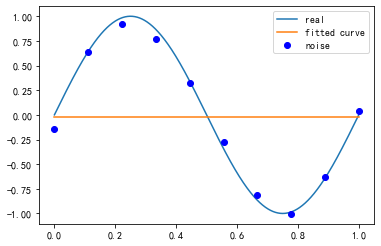

In [5]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.35825633  0.63691076]


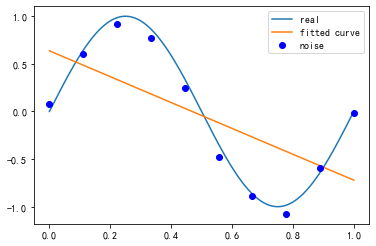

In [7]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [-1.37383313e+04  6.01361878e+04 -1.10268503e+05  1.10011654e+05
 -6.49383997e+04  2.31212778e+04 -4.83088895e+03  5.24356628e+02
 -1.74525441e+01  8.34721315e-02]


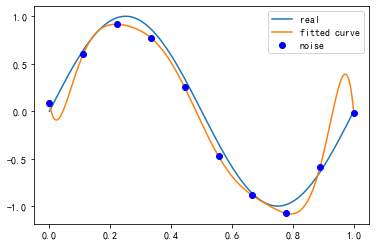

In [12]:
p_lsq_9 = fitting(M=9)

**正则化**

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合
$$Q(x)=\sum_{i+1}^n[h(x_i)-y_i]^2+\lambda||\omega||^2$$

回归问题中，损失函数是平方损失，正则化可以使参数向量的L2范数，也可以是L1范数
- L1: regularization * abs(p)
- L2: 0.5 * regularization * np.square(p)

In [9]:
regularization = 0.0001
def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

In [10]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

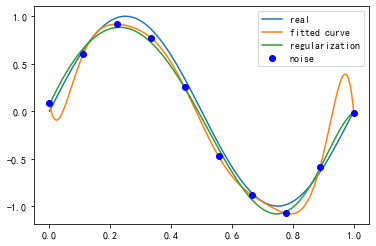

In [13]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

### 4.3.2.梯度下降法

[[-17.94304379]
 [  5.05371849]]


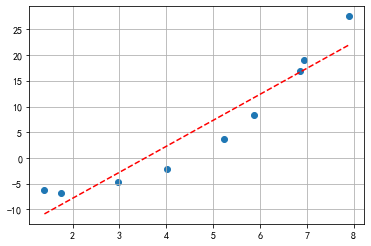

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = np.array([1.40015721,1.76405235,2.97873798,4.02272212,5.2408932,5.86755799,6.84864279,6.95008842,7.89678115])
y = np.array([-6.22959012,-6.80028513,-4.58779845,-2.1475575,3.62506375,8.40186804,16.84301125,18.99745441,27.56686965])

X.shape = -1, 1
y.shape = -1, 1

ones = np.ones(X.shape[0])
A = np.insert(X, 0, 1, axis=1)
b = y.reshape(-1,1)
x = np.linalg.inv(A.T @ A) @ A.T @ b
print(x)
plt.figure(facecolor='w')
plt.scatter(X,y)
y_pred = A @ x
plt.plot(X,y_pred,'r--')
plt.grid()

### 4.3.2.梯度下降法
具体参考[梯度下降法](01.基础-03.凸优化-03.梯度下降法.ipynb)

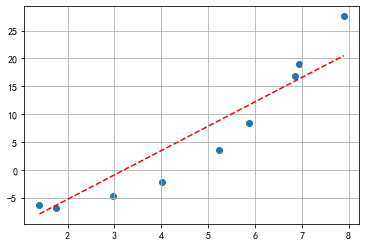

In [11]:
class LinearRegression(object):
    def __init__(self):
        pass
    def fit(self,X,y):
        X = np.insert(X, 0, 1, axis=1)
        y = y.reshape(-1,1)
        self.w = np.random.randn(X.shape[1],1)

        for _ in range(10000):
            y_pred = X @ self.w  # 100 * 1
            mse = np.mean(0.5*(y_pred-y)**2)
            grad_w = X.T @ (y_pred - y)
            self.w -= 0.0001 * grad_w
            # print(_,mse,self.w[0][0],self.w[1][0])

    def predict(self,X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.w

X = np.array([1.40015721,1.76405235,2.97873798,4.02272212,5.2408932,5.86755799,6.84864279,6.95008842,7.89678115])
y = np.array([-6.22959012,-6.80028513,-4.58779845,-2.1475575,3.62506375,8.40186804,16.84301125,18.99745441,27.56686965])

X.shape = -1, 1
y.shape = -1, 1

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
plt.figure(facecolor='w')
plt.scatter(X,y)
plt.plot(X,y_pred,'r--')
plt.grid()

### 4.3.3.闭式解

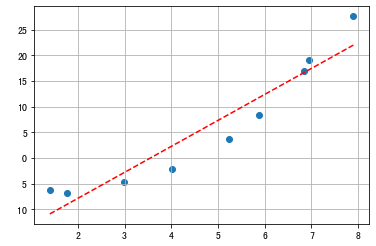

In [3]:
x_mean = np.mean(X)
Y = y.reshape(-1,1)
w = np.sum(Y*(X-x_mean))/(np.sum(X**2)-1./X.shape[0]*(np.sum(X))**2)
b = np.sum(Y-w*X)/X.shape[0]
plt.figure(facecolor='w')
plt.scatter(X,y)
y_pred = w * X + b
plt.plot(X,y_pred,'r--')
plt.grid()

# 5.注意
最小二乘法对$\alpha$的估计，是基于模型中变量之间相互独立的基本假设的，即输入向量x中的任意两项$x_i$和$x_j$之间是相互独立的。如果输入矩阵X中存在线性相关或者近似线性相关的列，那么输入矩阵X就会变成或者近似变成奇异矩阵（singular matrix）。这是一种病态矩阵，矩阵中任何一个元素发生一点变动，整个矩阵的行列式的值和逆矩阵都会发生巨大变化。这将导致最小二乘法对观测数据的随机误差极为敏感，进而使得最后的线性模型产生非常大的方差，这个在数学上称为多重共线性（multicollinearity）